In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from scipy import stats


# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');


In [14]:
#citim data
data = pd.read_csv("data_train.csv")
print(data.head(20))

print("Printam cate date contin fiecare coloana ca sa vedem daca nu cumva aveam coloane care contin date lipsa")
data.info()

print("Stergem ")
data.drop(['Unnamed: 0'], axis = 1, inplace = True) # stergem pt a nu ne incurca la calcule

    Unnamed: 0  age          workclass  fnlwgt      education  education-num  \
0        27239   34          Local-gov  144182      Preschool              1   
1        19102   20            Private  100605        HS-grad              9   
2        16791   26          State-gov  152457        HS-grad              9   
3         2832   57   Self-emp-not-inc  353808   Some-college             10   
4         8228   48          State-gov  122086        HS-grad              9   
5        14864   37       Self-emp-inc   26698   Some-college             10   
6         9220   55            Private  170169        HS-grad              9   
7         3623   31            Private  247328            9th              5   
8        28966   39        Federal-gov  184964   Some-college             10   
9         8257   19            Private  351040   Some-college             10   
10        3300   31            Private  189461     Assoc-acdm             12   
11       17062   23            Private  

In [15]:
#O prima analiza pe care o putem face este sa vedem cati indivizi apartin
# fiecarui grup, <=50k / >50k
nr_of_records = data.shape[0]
less_50k = data[data['label']==' <=50K'].shape[0]
greater_50k = data[data['label']==' >50K'].shape[0]
percent_greater_50k = (greater_50k / nr_of_records )*100

print("Numarul de date: {}".format(nr_of_records))
print("Nr of <=50K {}".format(less_50k))
print("Nr of >50K {}".format(greater_50k))
print("Procent >50K {}".format(percent_greater_50k))

Numarul de date: 29304
Nr of <=50K 22289
Nr of >50K 7015
Procent >50K 23.938711438711437


In [16]:
#Preprocesare
#Stergem liniile care au atribute necompletate
coloane = data.columns
print("coloane: {}".format(coloane))
date_numerice = data.shape[0]
for c in coloane:
    date_incomplete = data[c].isin([" ?"]).sum()
    #print("date_incomplete: {}".format(date_incomplete))
    if date_incomplete > 0:
        print(c)
        print(date_incomplete)
        print("{0:.2f}%".format(float(date_incomplete) / date_numerice * 100))


coloane: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'label'],
      dtype='object')
workclass
1650
5.63%
occupation
1655
5.65%
native-country
527
1.80%


Inlocuim <=50K si >50K in data frame in 0 si 1
data_plot
    age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0    34  144182              1             0             0              25   
1    20  100605              9             0             0              40   
2    26  152457              9             0             0              40   
3    57  353808             10             0             0              60   
4    48  122086              9             0             0              40   
5    37   26698             10             0          1485              44   
6    55  170169              9             0             0              40   
7    31  247328              5          3137             0              40   
8    39  184964             10             0             0              40   
9    19  351040             10             0             0              40   
10   31  189461             12             0             0              41   
11   23

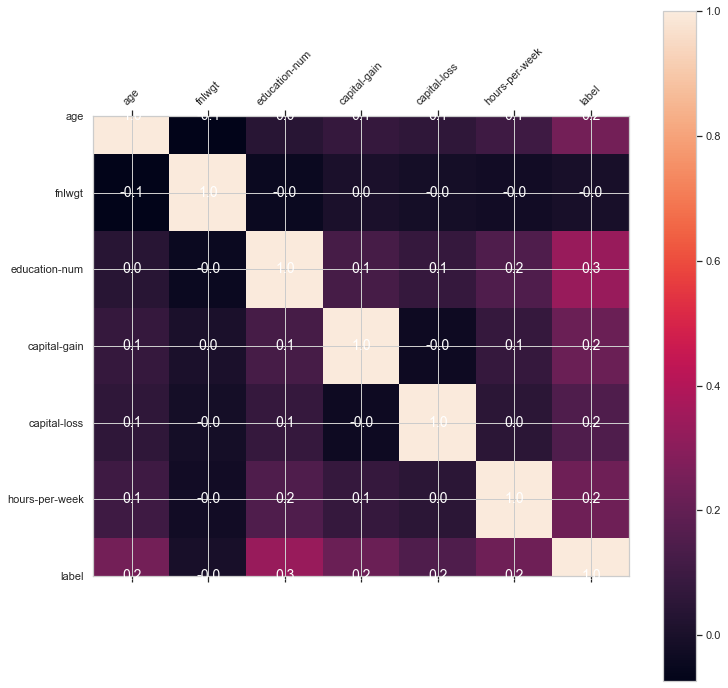

In [17]:
#stergem liniile care contin "?" la oricare din atribute
data = data[data["workclass"] != " ?"]
data = data[data["occupation"] != " ?"]
data = data[data["native-country"] != " ?"]
#data = data[data["age"] != " ?"]
#data = data[data["fnlwgt"] != " ?"]
data = data[data["education"] != " ?"]
#data = data[data["education-num"] != " ?"]
data = data[data["marital-status"] != " ?"]
data = data[data["relationship"] != " ?"]
data = data[data["race"] != " ?"]
data = data[data["sex"] != " ?"]
# data = data[data["capital-gain"] != " ?"]
# data = data[data["capital-loss"] != " ?"]
# data = data[data["hours-per-week"] != " ?"]
data = data[data["label"] != " ?"]

#inlocuim n/a din atributele numerice cu 0
data = data.replace(np.nan, 0)
#inlocuim "<=50K" si ">50K" in data frame in "0" si "1"
print("Inlocuim <=50K si >50K in data frame in 0 si 1")
venit = ({' <=50K':0,' >50K':1})
data.label=[venit[item] for item in data.label]
# am creat data_plot care contine doar atributele numerice 
data_plot=data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','label']]
print("data_plot")
print(data_plot.head(20))
#afisam o corelatie intre toate datele numerice
plt.matshow(data_plot.corr())
plt.colorbar()
plt.xticks(np.arange(len(data_plot.corr().columns)), data_plot.corr().columns.values, rotation = 45)
plt.yticks(np.arange(len(data_plot.corr().columns)), data_plot.corr().columns.values)
for (i, j), corr in np.ndenumerate(data_plot.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)



    age          workclass  fnlwgt      education  education-num  \
0    34          Local-gov  144182      Preschool              1   
1    20            Private  100605        HS-grad              9   
2    26          State-gov  152457        HS-grad              9   
3    57   Self-emp-not-inc  353808   Some-college             10   
4    48          State-gov  122086        HS-grad              9   
5    37       Self-emp-inc   26698   Some-college             10   
6    55            Private  170169        HS-grad              9   
7    31            Private  247328            9th              5   
8    39        Federal-gov  184964   Some-college             10   
9    19            Private  351040   Some-college             10   
10   31            Private  189461     Assoc-acdm             12   
11   23            Private  213811      Bachelors             13   
12   28            Private  243660        HS-grad              9   
13   19            Private  136306           11t

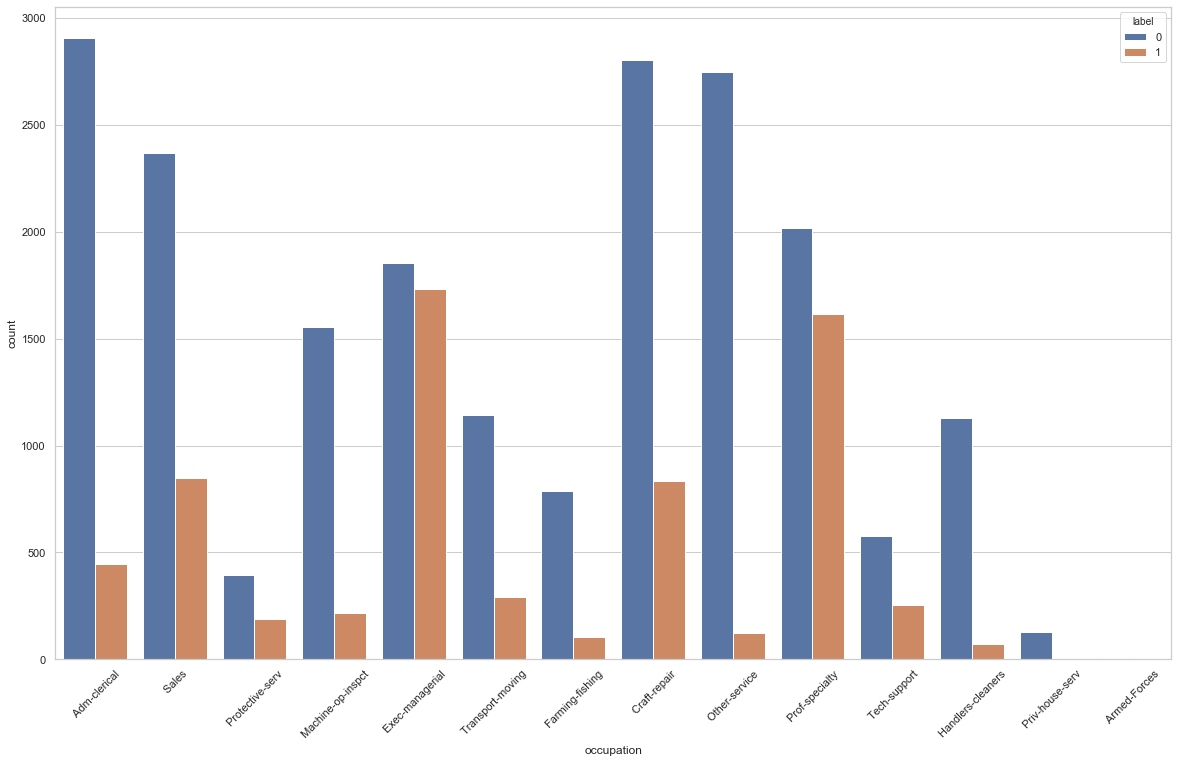

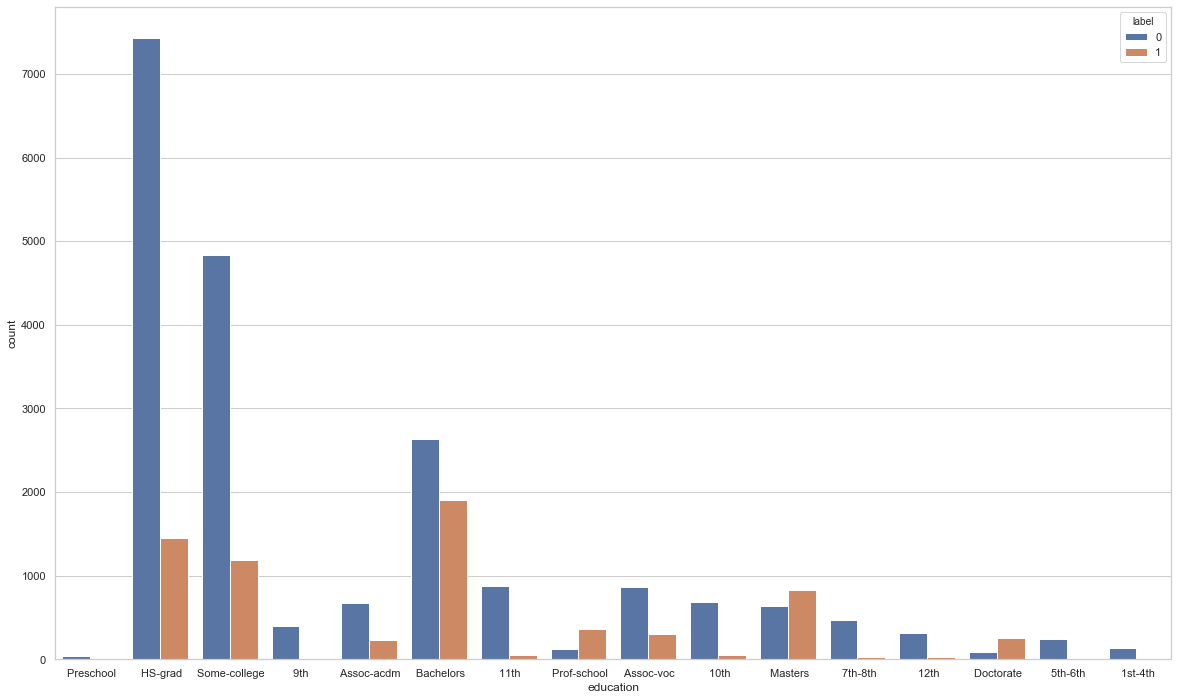

XXX


In [18]:
#dupa cum vedem cele mai relevante atribute sunt age, education-num, capital-gain
#procesam atributele "categorie"


print(data.head(20))

tari=data['native-country'].value_counts()
print(tari)

plt.xticks(rotation = 45)
sns.set(style="whitegrid")
sns.countplot(x = 'occupation', hue = 'label', data=data)
plt.show()

sns.countplot(x = 'education', hue = 'label', data=data)
plt.show()

print("XXX")

In [19]:
#Education si Education Number
education_classes = data['education'].unique()
for edu_class in education_classes:
    print("Pentru {},  Education Number este  {}".format(edu_class, data[data['education'] == edu_class]['education-num'].unique()))

#din analiza de mai sus am descoperit ca education si education-num sunt la fel, deci putem sa eliminam una dintre ele si voi combina informatiile in ce priveste educatia, intr-o singura coloana

data.drop(['education-num'], axis = 1, inplace = True)
data['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],' School', inplace = True)
print("education begin")
print(data['education'].value_counts())
print("education end")

Pentru  Preschool,  Education Number este  [1]
Pentru  HS-grad,  Education Number este  [9]
Pentru  Some-college,  Education Number este  [10]
Pentru  9th,  Education Number este  [5]
Pentru  Assoc-acdm,  Education Number este  [12]
Pentru  Bachelors,  Education Number este  [13]
Pentru  11th,  Education Number este  [7]
Pentru  Prof-school,  Education Number este  [15]
Pentru  Assoc-voc,  Education Number este  [11]
Pentru  10th,  Education Number este  [6]
Pentru  Masters,  Education Number este  [14]
Pentru  7th-8th,  Education Number este  [4]
Pentru  12th,  Education Number este  [8]
Pentru  Doctorate,  Education Number este  [16]
Pentru  5th-6th,  Education Number este  [3]
Pentru  1st-4th,  Education Number este  [2]
education begin
 HS-grad         8878
 Some-college    6030
 Bachelors       4534
 School          3349
 Masters         1466
 Assoc-voc       1161
 Assoc-acdm       908
 Prof-school      487
 Doctorate        333
Name: education, dtype: int64
education end


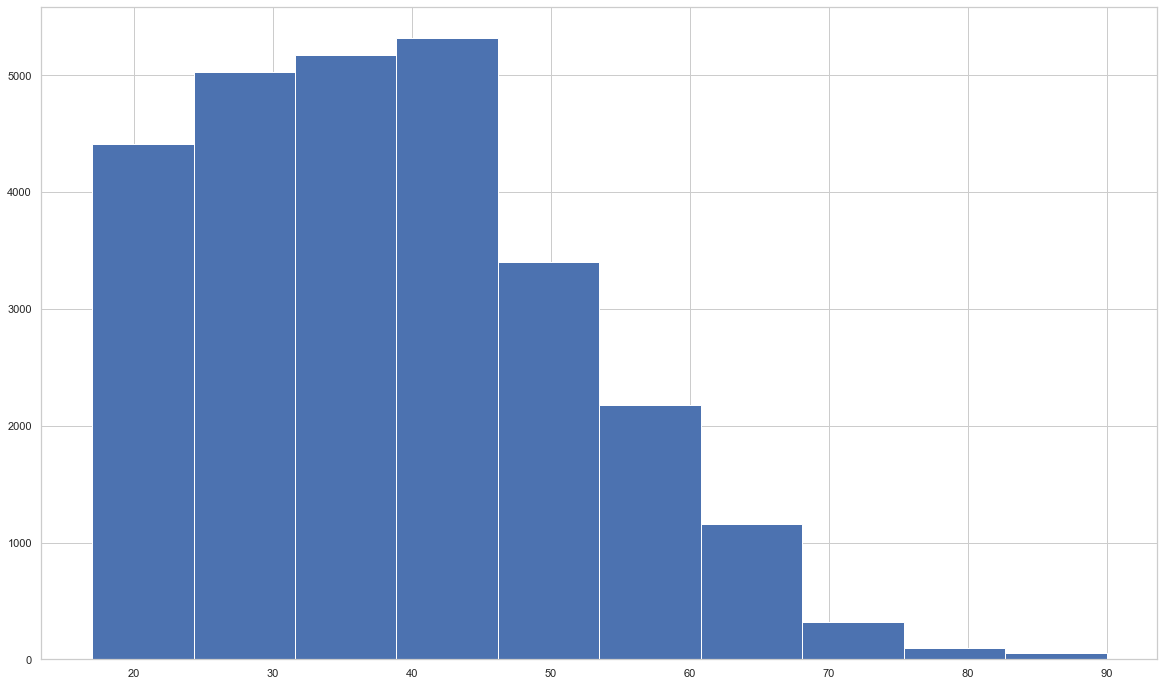

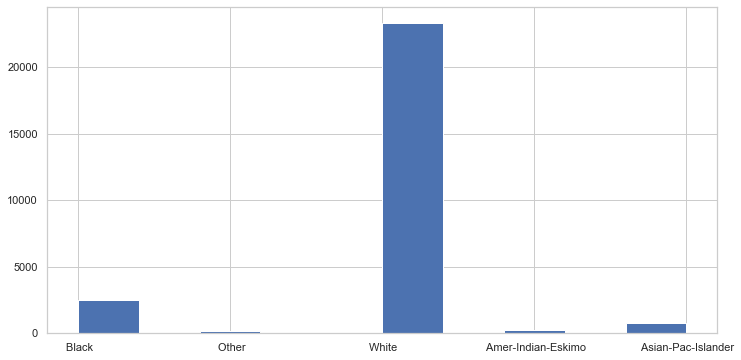

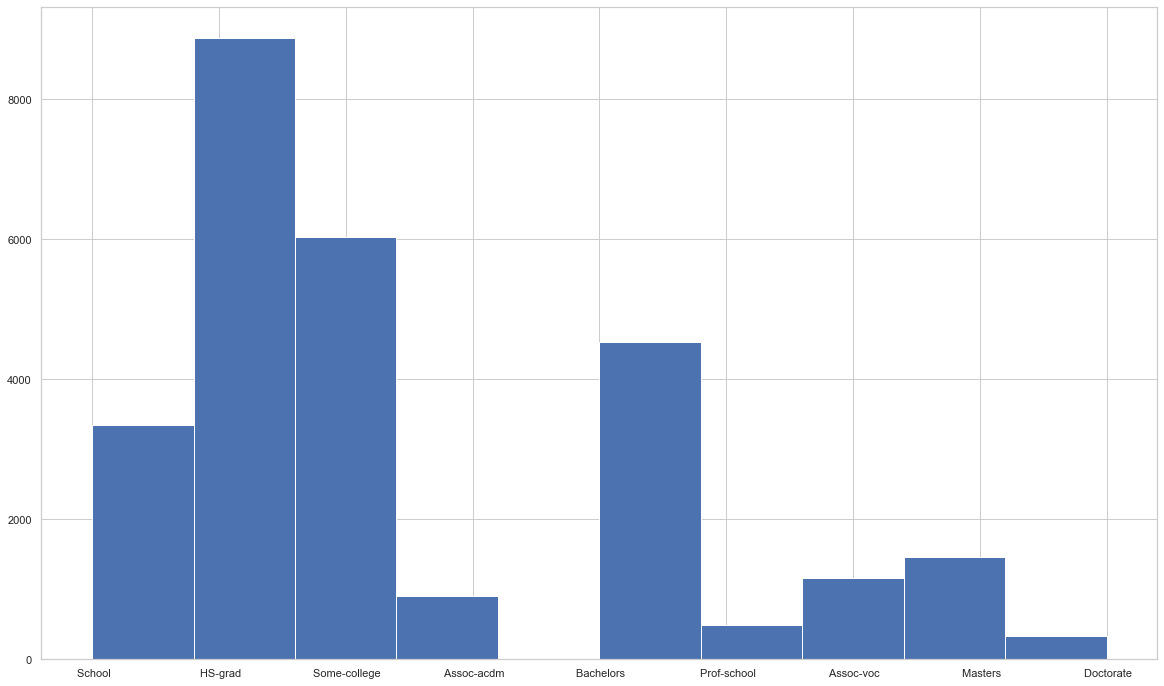

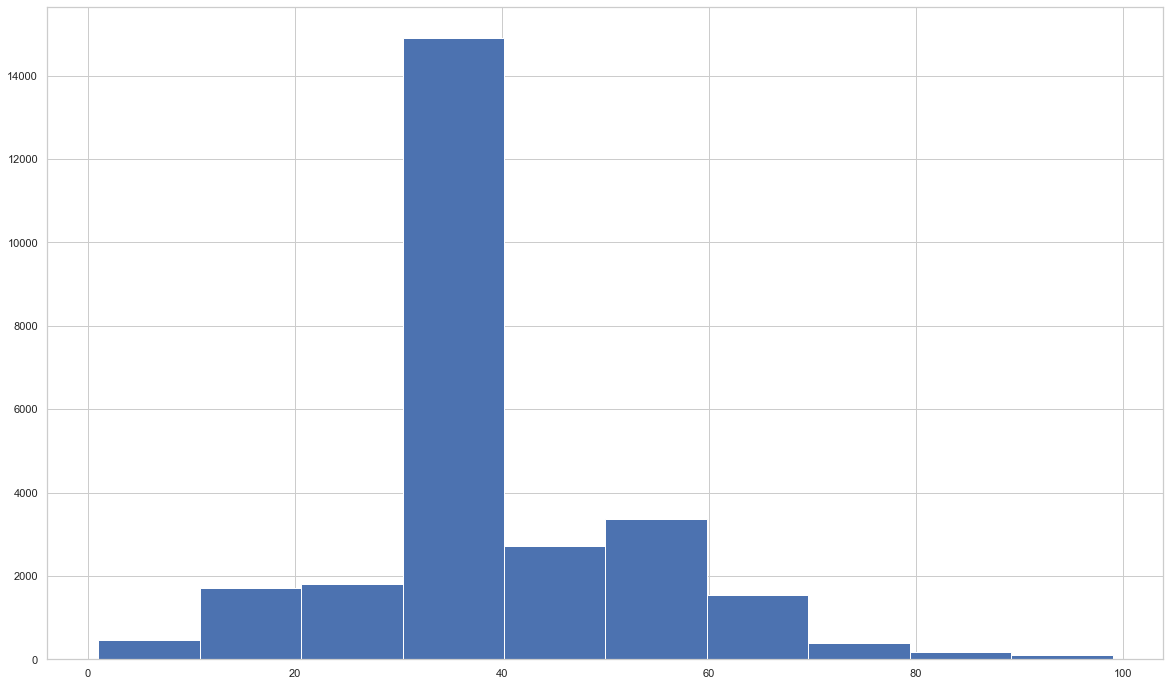

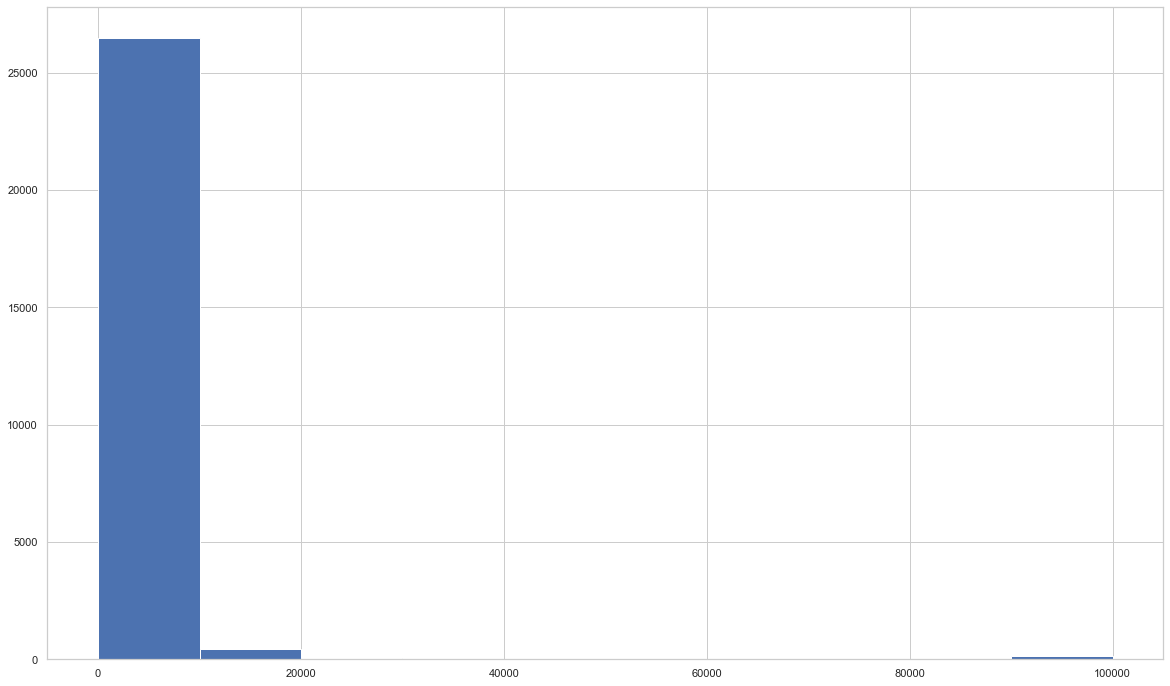

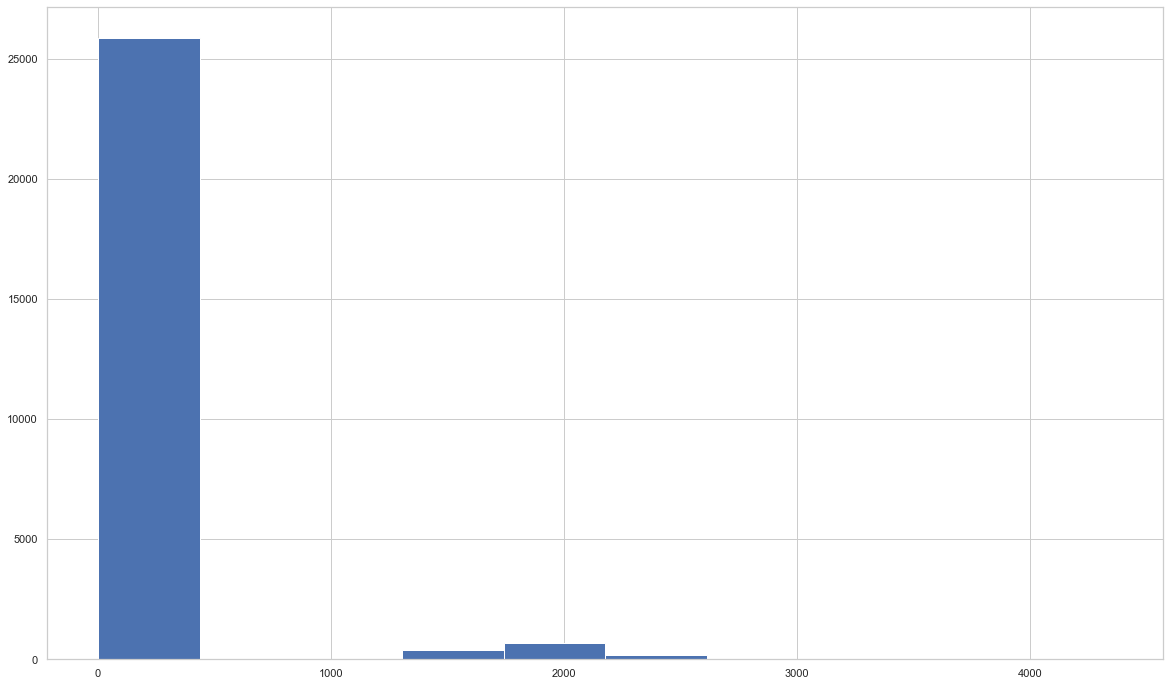

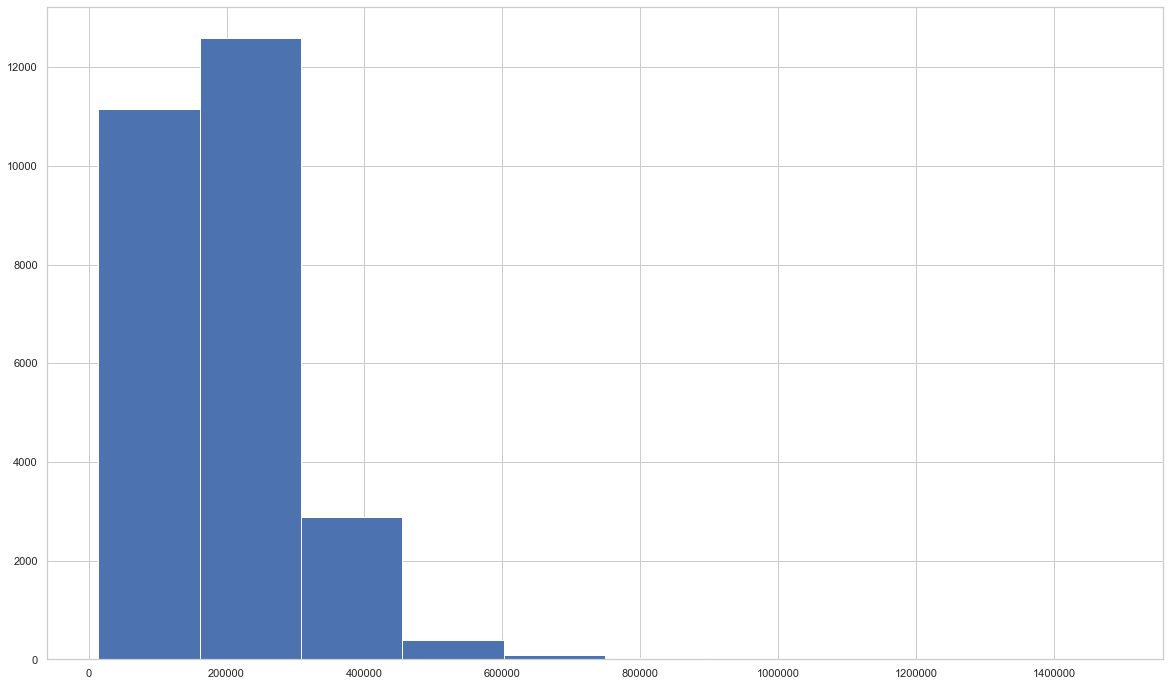

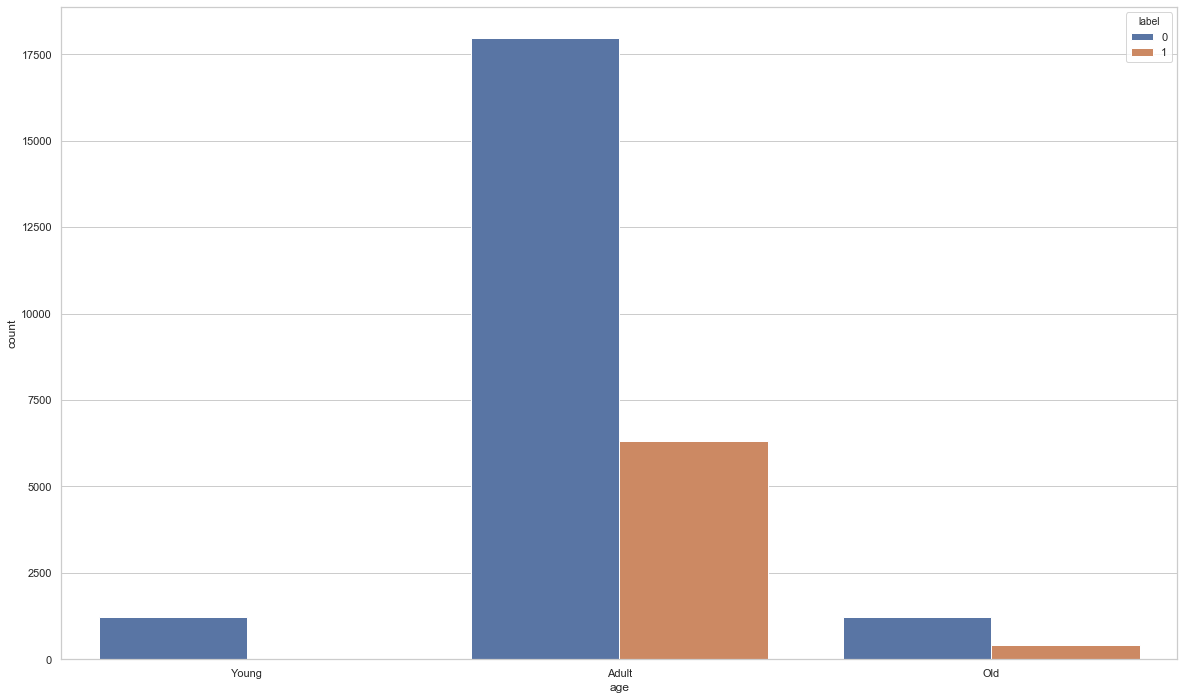

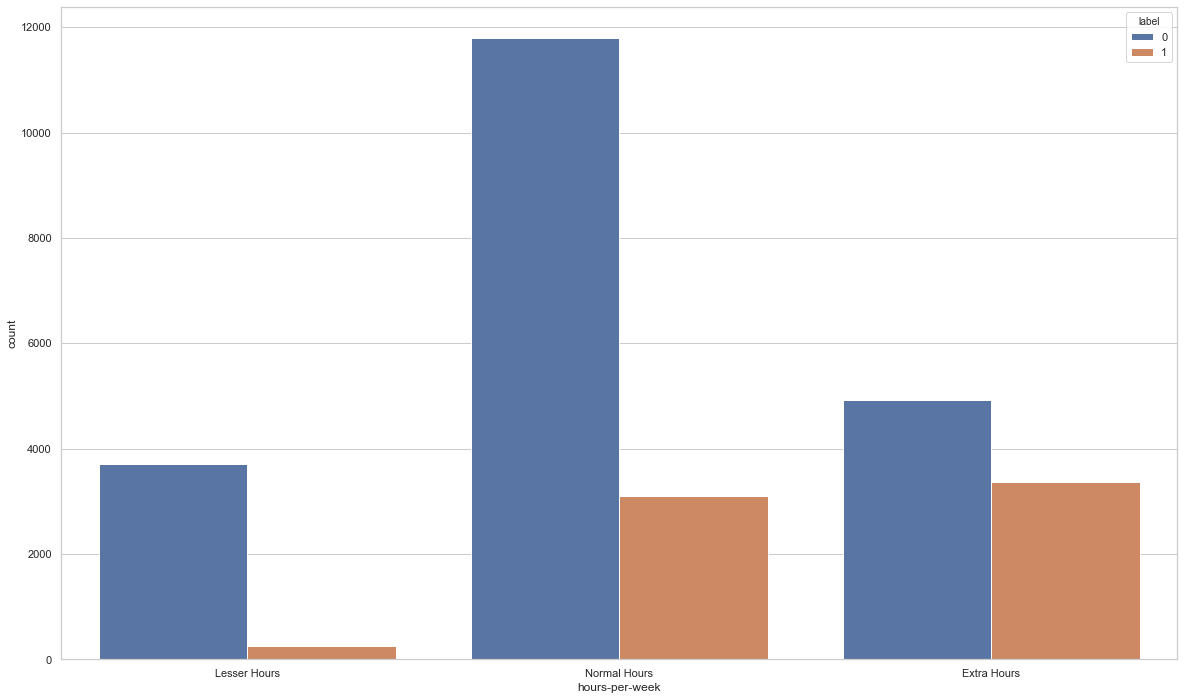

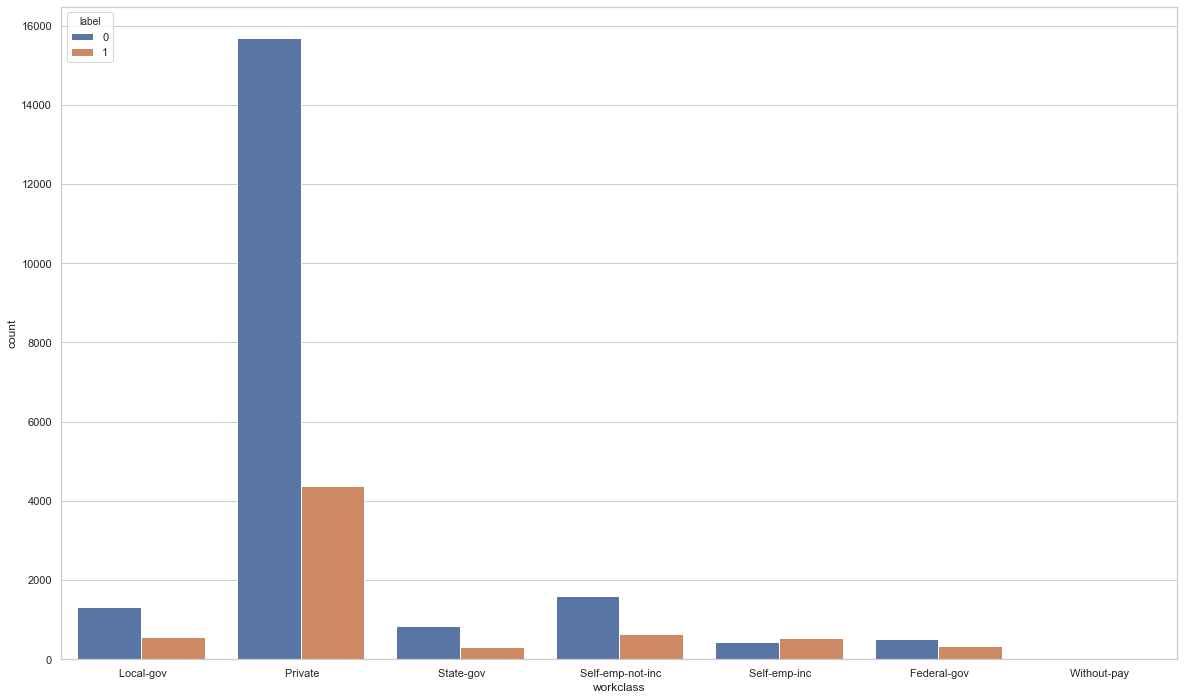

 Married-civ-spouse       12621
 Never-married             8803
 Divorced                  3794
 Separated                  842
 Widowed                    739
 Married-spouse-absent      327
 Married-AF-spouse           20
Name: marital-status, dtype: int64
 Husband           11203
 Not-in-family      6929
 Own-child          4039
 Unmarried          2912
 Wife               1248
 Other-relative      815
Name: relationship, dtype: int64


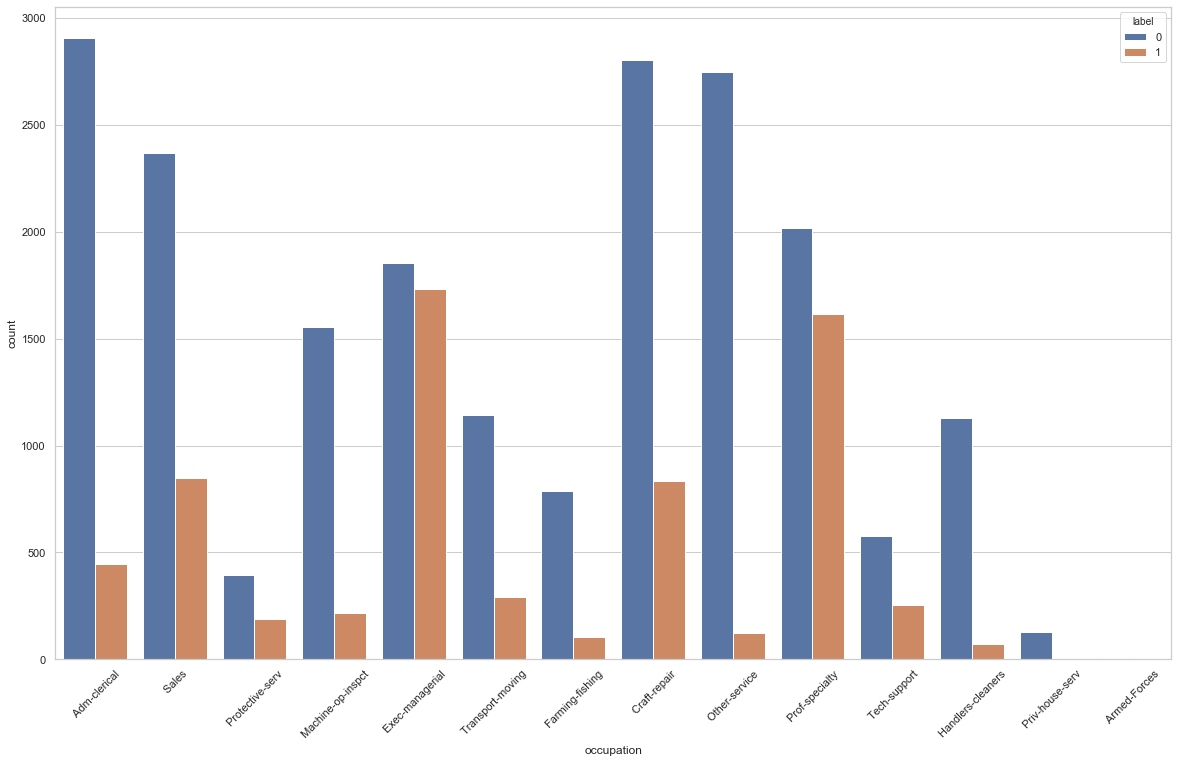

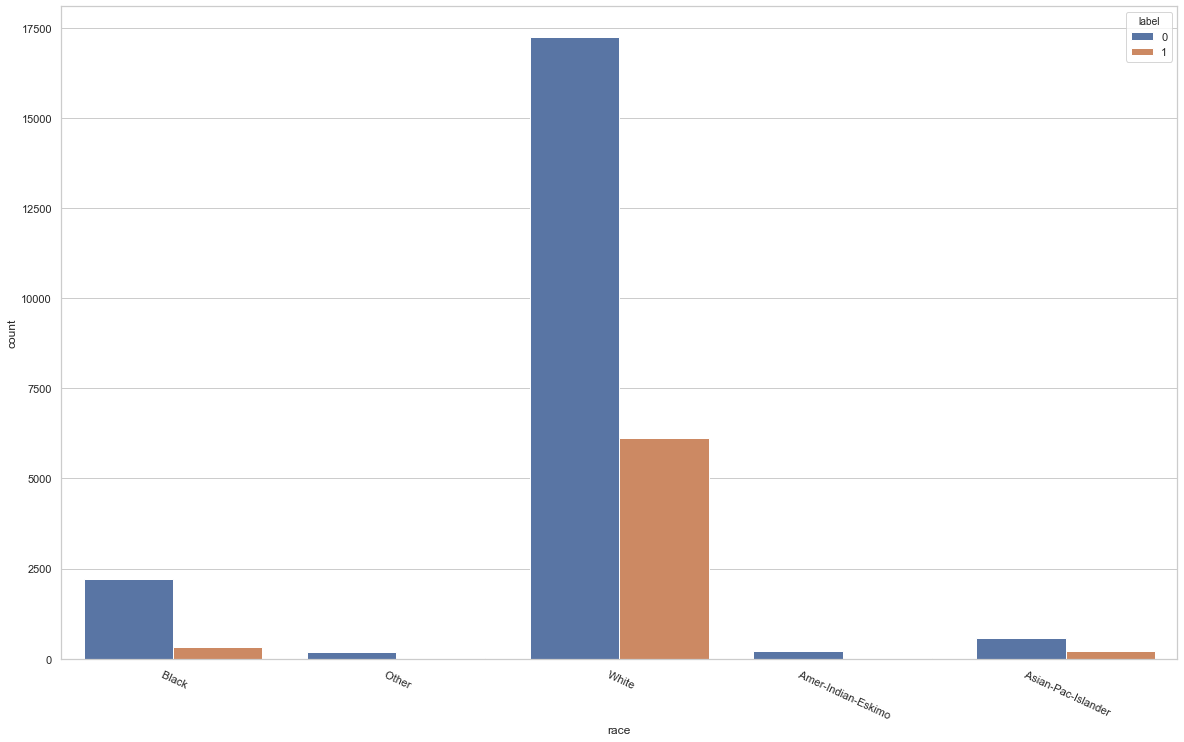

M/F


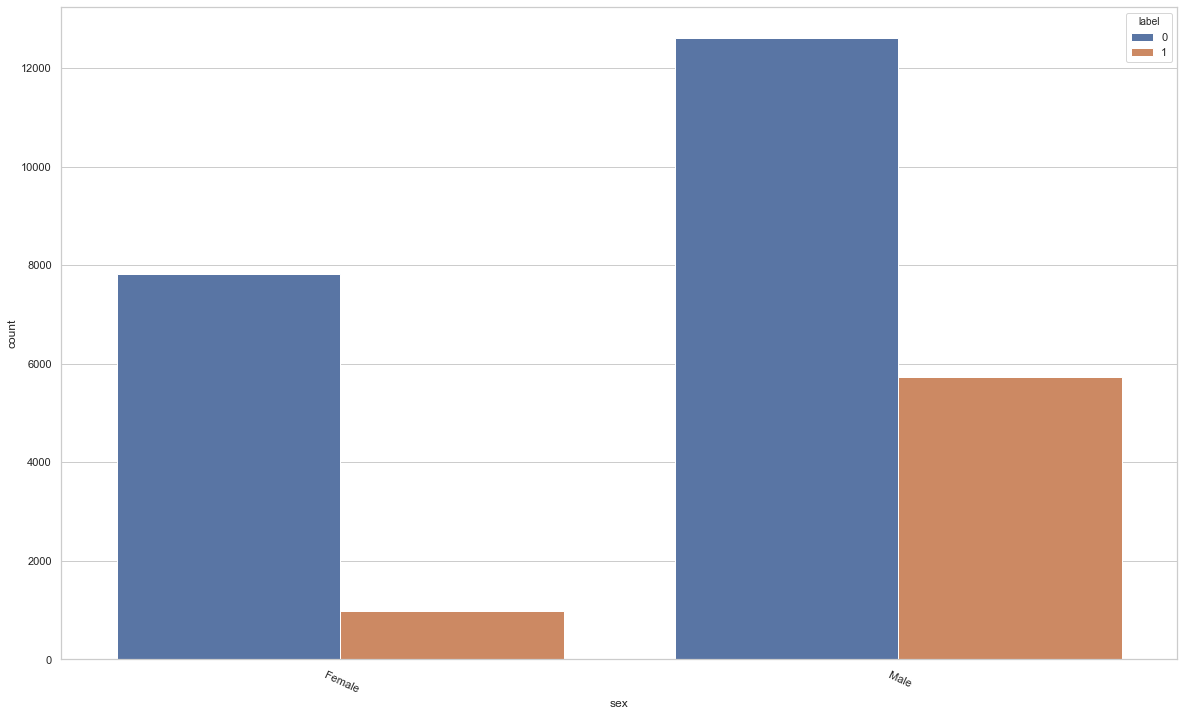

 United-States                 24767
 Mexico                          543
 Philippines                     168
 Germany                         120
 Canada                           98
 Puerto-Rico                      98
 El-Salvador                      89
 India                            88
 Cuba                             81
 England                          78
 South                            68
 Jamaica                          68
 Italy                            64
 China                            61
 Dominican-Republic               59
 Guatemala                        59
 Vietnam                          55
 Japan                            53
 Columbia                         50
 Poland                           50
 Haiti                            40
 Taiwan                           39
 Iran                             37
 Nicaragua                        31
 Portugal                         30
 Greece                           27
 Peru                             26
 

In [20]:
rcParams['figure.figsize'] = 20, 12
data['age'].hist()
plt.show()

rcParams['figure.figsize'] = 12, 6
data['race'].hist()
plt.show()
rcParams['figure.figsize'] = 20, 12
data['education'].hist()
plt.show()

rcParams['figure.figsize'] = 20, 12
data['hours-per-week'].hist()
plt.show()
rcParams['figure.figsize'] = 20, 12
data['capital-gain'].hist()
plt.show()

rcParams['figure.figsize'] = 20, 12
data['capital-loss'].hist()
plt.show()

rcParams['figure.figsize'] = 20, 12
data['fnlwgt'].hist()
plt.show()
#From the histograms above, I can draw the following conclusion:

#group the Age column into bins

#Final Weight is also left skewed.
# The Hours per Week can also be split into bins



# Age
# Split the age in 3 categories
#
# 0-19: Young
# 19-60: Adult
# 60-100:Old

data['age'] = pd.cut(pd.to_numeric(data['age'],errors='coerce'),
                        bins = [0, 19, 60, 100],
                        labels = ['Young', 'Adult', 'Old'])
sns.countplot(x = 'age', hue = 'label', data = data)
plt.show()


#drop final weight
data.drop(['fnlwgt'], axis = 1, inplace = True)

# Hours per Week
# Split the hours-per-week in 3 categories. As usually, the work hours are close to 30-40 hours
#
# 0-30: hours
# 30-40: hours
# 40-100:hours
data['hours-per-week'] = pd.cut(pd.to_numeric(data['hours-per-week'],errors='coerce'),
                                   bins = [0, 30, 40, 100],
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])
sns.countplot(x = 'hours-per-week', hue = 'label', data = data)
plt.show()

# # Work Class
sns.countplot(x = 'workclass', hue = 'label', data = data)
plt.show()
#
# # Marital Status and Relationship
#
print(data['marital-status'].value_counts())
#
print(data['relationship'].value_counts())
# #Both of them have no missing values. That's great!
#
#
# #Occupation
plt.xticks(rotation = 45)
sns.countplot(x = 'occupation', hue = 'label', data = data)
plt.show()
#
# #race
plt.xticks(rotation = -25)
sns.countplot(x = 'race', hue = 'label', data = data)
plt.show()
#
# #Sex
print("M/F")
plt.xticks(rotation = -25)
sns.countplot(x = 'sex', hue = 'label', data = data)
plt.show()
#
# #country
country_count = data['native-country'].value_counts()
print(country_count)


In [21]:


#am realizat restul corelatiilor

coloane = data.columns
param=[]
corelatie=[]
corelatie_abs=[]
for c in coloane:
    if c!="label":
        cor = spearmanr(data['label'],data[c])[0]
        param.append(c)
        corelatie.append(cor)
        corelatie_abs.append(abs(cor))
param_df=pd.DataFrame({'corelatie':corelatie,'parametru':param,'corelatie_abs':corelatie_abs})
param_df=param_df.sort_values(by=['corelatie_abs'],ascending=False)
param_df=param_df.set_index('parametru')
print(param_df)


                corelatie  corelatie_abs
parametru                               
relationship    -0.335142       0.335142
capital-gain     0.277641       0.277641
marital-status  -0.228318       0.228318
sex              0.218023       0.218023
hours-per-week  -0.164681       0.164681
capital-loss     0.142025       0.142025
education       -0.127997       0.127997
age             -0.087671       0.087671
race             0.080517       0.080517
occupation       0.054137       0.054137
native-country   0.033489       0.033489
workclass        0.027761       0.027761


In [22]:
#alegem cei mai buni parametri

top_features=param_df.index[0:4].values
print('top_features: \t',top_features)


data_y_train = data_plot['label']
data_x_train = data_plot.drop(['label'], axis = 1)
print("Total features: {}".format(data_x_train.shape[1]))
print("data_y_train.head(20): {}".format(data_y_train.head(20)))

linreg = LinearRegression()


top_features: 	 ['relationship' 'capital-gain' 'marital-status' 'sex']
Total features: 6
data_y_train.head(20): 0     0
1     0
2     0
3     1
4     0
5     1
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    1
17    0
18    0
19    0
20    0
Name: label, dtype: int64


In [23]:
#ADVANCED STATS
linreg = LinearRegression()
#Linear regression on all three subsets of data to see which scores the best
x_train, x_test, y_train, y_test=train_test_split(data_x_train, data_y_train, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, data_x_train, data_y_train, cv=2)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, data_y_train))
score = metrics.r2_score(data_y_train, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

Root Mean Squared Error is : 0.37944020248272237
R sq is : 0.22729143224124015


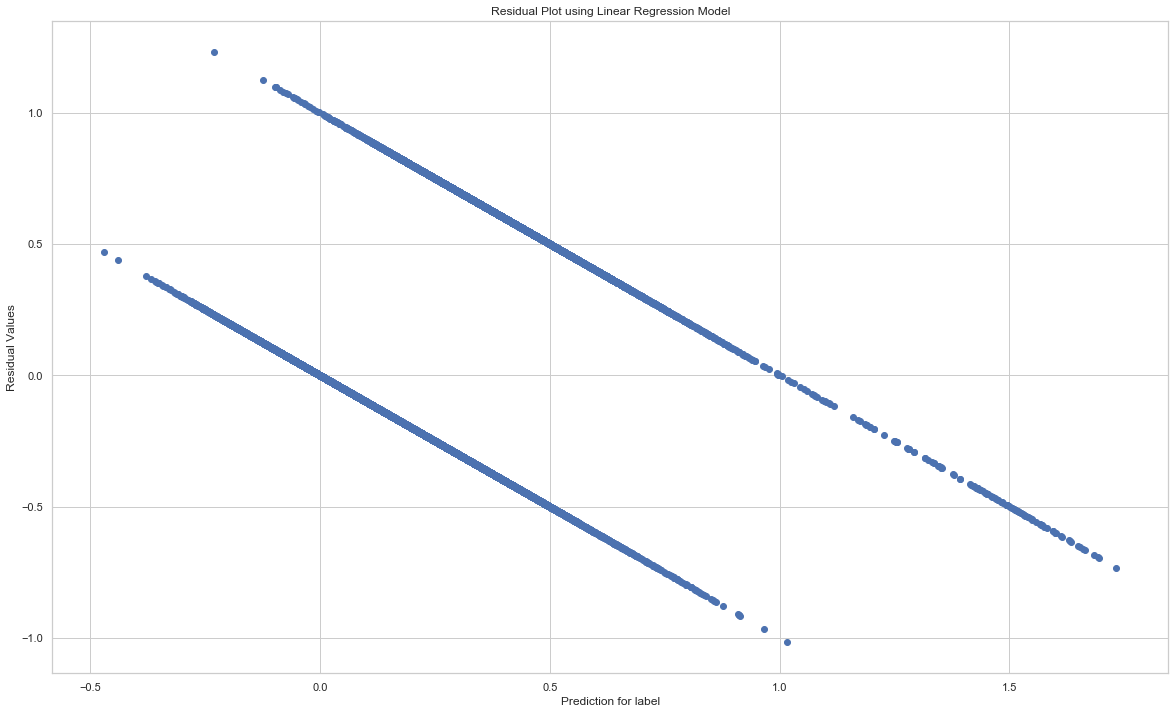

[-0.33453223  0.04040419  0.0843586  ...  0.38560221  0.33510996
  0.0762352 ]


In [24]:
#create residual plot
residuals = data_y_train - predict
plt.scatter(predict, residuals)
plt.xlabel('Prediction for label')
plt.ylabel('Residual Values')
plt.title('Residual Plot using Linear Regression Model')
plt.show()

print(predict)

In [30]:
#
# Data Manipulation
# In this subsection, I'll take all the remaining columns and create important numerical values out of them.
#
# I will use the get_dummies method of pandas to get separate columns for each feature based on the unqiue values in the dataset
y_train_data = data['label']
X_train_data = data.drop(['label'], axis = 1)
X_train_data=pd.get_dummies(X_train_data)
print("Total features: {}".format(X_train_data.shape[1]))

X_train, X_test, y_train, y_test=train_test_split(X_train_data, y_train_data, test_size=0.25, random_state=0)




# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

# ROC curve and Area-Under-Curve (AUC)

y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

def predict(dataframe,y):
    y_test = y
    X_test = dataframe

    # train with Gradient Boosting algorithm
    # compute the accuracy scores on train and validation sets when training with different learning rates

    learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

    print("se printeaza pentru un set de date de test custom")
    for learning_rate in learning_rates:
        gb = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2,
                                        random_state=0)
        gb.fit(X_train, y_train)
        print("Learning rate: ", learning_rate)
        print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
        print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
        print()

    # Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

    gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
    gb.fit(X_train, y_train)
    predictions = gb.predict(X_test)

    print("Classification Report")
    print(classification_report(y_test, predictions))

    # ROC curve and Area-Under-Curve (AUC)

    y_scores_gb = gb.decision_function(X_test)
    fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    print("predictiile pentru coloana y(label)  sunt: ")
    print(predictions)

    return 1;

#ne declaram doua variabile care vor tine locul datelor de test
test_dataframe_x = X_train_data.head(1000)
test_dataframe_y = y_train_data.head(1000)
#apelam functia predict cu niste date de test
predict(test_dataframe_x,test_dataframe_y)

Total features: 99
Learning rate:  0.05
Accuracy score (training): 0.752
Accuracy score (validation): 0.754

Learning rate:  0.1
Accuracy score (training): 0.753
Accuracy score (validation): 0.754

Learning rate:  0.25
Accuracy score (training): 0.788
Accuracy score (validation): 0.793

Learning rate:  0.5
Accuracy score (training): 0.811
Accuracy score (validation): 0.816

Learning rate:  0.75
Accuracy score (training): 0.815
Accuracy score (validation): 0.823

Learning rate:  1
Accuracy score (training): 0.817
Accuracy score (validation): 0.829

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5115
           1       0.73      0.40      0.52      1672

    accuracy                           0.82      6787
   macro avg       0.78      0.68      0.70      6787
weighted avg       0.81      0.82      0.80      6787

Area under ROC curve = 0.87
se printeaza pentru un set de date de test custom
Learning rate:  0.0

1

In [ ]:
# Din pacate NU am reusit sa duc la bun sfarsit proiectul, insa am incercat sa implementez cativa  pasii din planul predictor
# Dupa cum putem observa din grafice si analiza datelor, cele mai semnificative atribute in stabilirea "label" sunt: age,relationship, capital-gain, hours-per-week 

In [ ]:
### 2. Pentru acelasi set de date, construiti un plan pentru a oferi o recomandare bazata pe date de crestere a venitului la peste 50k$/year.

#In ce priveste planul de recomandare, putem sa recomandam unei persoane pentru a-si mari venitul sa aiba mai multe relatii, sa iti creasca nivelul de educatie, sa aloce mai multe ore de munca pe saptamana .
